In [5]:
import pandas as pd
#import various python libraries
import requests
import csv
import bs4
import re
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from datetime import date


In [6]:
!ls

Deaths over 100.png
Deaths past 100.ipynb
Five States and COVID19 DEATHS past 100.png
Five States and COVID19 DEATHS past 100_MA_GA_CO.png
Five States and COVID19 DEATHS past 100_WA_LA_IL.png
LICENSE
README.md
pop_dens.csv
us-counties.csv
us-states.csv
us.csv


In [127]:
df = pd.read_csv('us-counties.csv')

In [128]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [129]:
bay_area_ = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara',\
            'Solano','Sonoma']

In [135]:
bay_area = df[df['county'].isin(bay_area_)].copy()
bay_area.drop(columns=['fips'], inplace=True)

In [133]:
times = pd.date_range(start='2020-02-26', end='2020-04-15')
len(times)

50

In [136]:
bay_area['date'].max()

'2020-04-19'

In [138]:
bay_area_Apr19 = bay_area[bay_area['date']=='2020-04-19']

In [149]:
total = bay_area_Apr19['cases'].sum()

In [151]:
bay_area_Apr19['% of Cases'] = bay_area_Apr19['cases'].apply(lambda x: round(x/total*100, 3))

/Users/shhuds/opt/anaconda3/envs/geo_folium/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
bay_area_Apr19

,date,county,state,cases,deaths,% of Cases
70385,2020-04-19,Alameda,California,1185,42,18.682
70391,2020-04-19,Contra Costa,California,693,20,10.925
70404,2020-04-19,Marin,California,195,10,3.074
70409,2020-04-19,Napa,California,47,2,0.741
70419,2020-04-19,San Francisco,California,1160,20,18.288
70422,2020-04-19,San Mateo,California,838,28,13.211
70424,2020-04-19,Santa Clara,California,1870,74,29.481
70428,2020-04-19,Solano,California,174,2,2.743
70429,2020-04-19,Sonoma,California,181,2,2.854


In [156]:
!ls ../Coursera_Capstone/data

Alameda_Hospital_Venues.csv
Category:Hospitals_in_the_San_Francisco_Bay_Area
FOOD&HEALTHWorkersBAYAREA.csv
Geospatial_data
Hospital_CLusters_and_venues.csv
Hospital_locations
Hospital_locations.csv
bay_area_geo.cvs
corrected_addresses.csv
food_health_workers.csv
hospital_venues_ratings.csv
postalcodesT


In [157]:
bay_area_Apr19[['county', '% of Cases']].to_csv('../Coursera_Capstone/data/bay_areaApr19.csv')

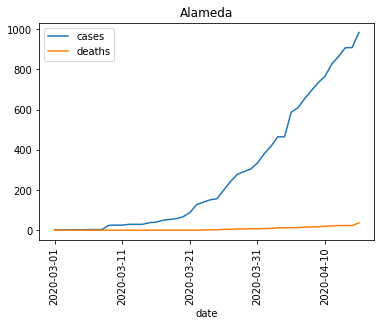

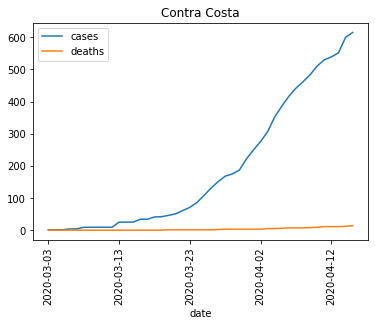

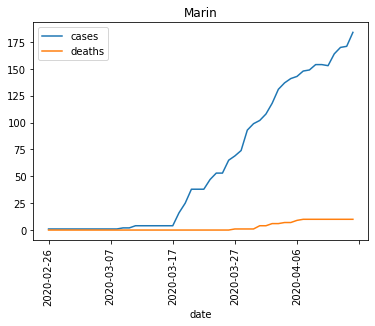

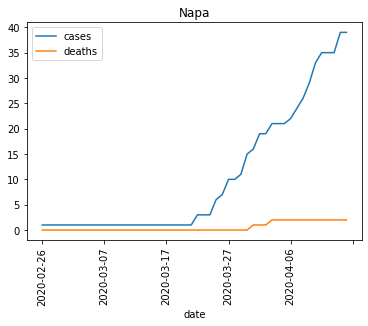

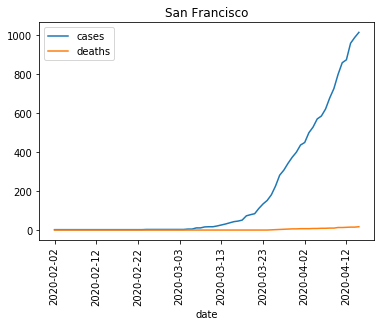

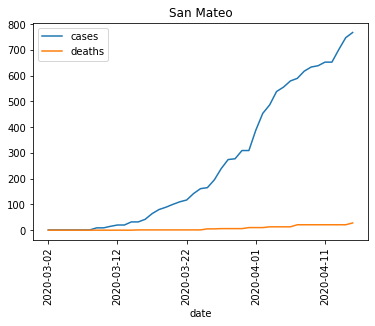

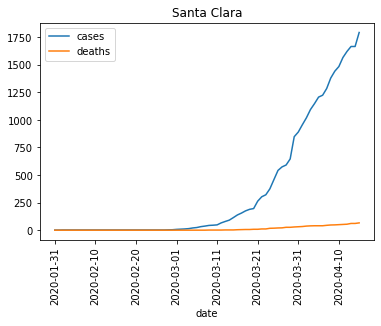

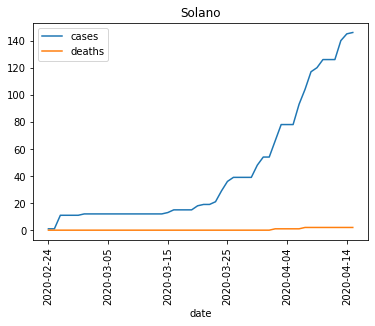

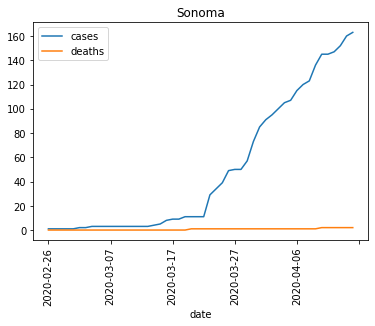

In [124]:
ax = fig_size=(8,6)
for x in bay_area_:
    bay_area[bay_area['county']==x].plot(kind='line',x='date',rot=90, title = x)
    

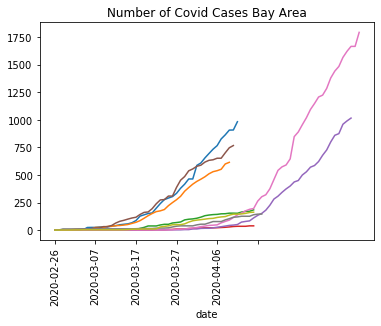

In [62]:

for x in bay_area_:
    bay_area.groupby(['county', 'date'])['cases'].mean()[x].plot(kind='line', rot=90, title='Number of Covid Cases Bay Area')


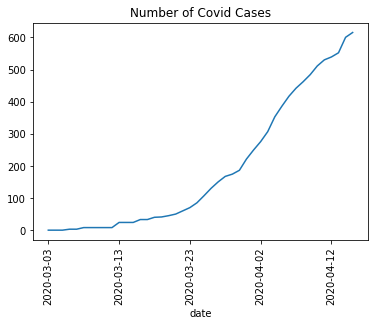

In [24]:
bay_area.groupby(['county', 'date'])['cases'].sum()['Contra Costa'].plot(kind='line', rot=90, title='Number of Covid Cases')

In [ ]:
bay_area.groupby(['county', 'date'])['cases'].sum()['Alameda'].plot(kind='line', title='Number of Covid Cases')

In [589]:
df_ny = df[df['state']== 'New York']
df_ny.head()

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
519,2020-03-04,Westchester,New York,36119.0,9,0


In [590]:
df_ca = df[df['state']== 'California']

In [591]:
df_daily_total_ca = pd.DataFrame(df_ca.groupby(['date'])['cases'].sum())


In [592]:
df_daily_death_ca = pd.DataFrame(df_ca.groupby(['date'])['deaths'].sum())


In [593]:
df_daily_death_ca[df_daily_death_ca['deaths'] > 100]

,deaths
date,
2020-03-27,104
2020-03-28,122
2020-03-29,132
2020-03-30,147
2020-03-31,184
2020-04-01,211
2020-04-02,246
2020-04-03,282
2020-04-04,323


In [71]:
df_daily_total_ny = pd.DataFrame(df_ny.groupby(['date'])['cases'].sum())

df_daily_death_ca = pd.DataFrame(df_ca.groupby(['date'])['deaths'].sum())

df_daily_death_ny = pd.DataFrame(df_ny.groupby(['date'])['deaths'].sum())
df_daily_death_ny.columns =['NY Deaths']
df_daily_death_ca.columns =['CA Deaths']


NameError: name 'df_ny' is not defined

In [77]:
greater_100_ny = deaths_over_100('New York', df)
greater_100_ca = deaths_over_100('California', df)

In [78]:
len(greater_100_ny.index), len(greater_100_ca.index)

(25, 20)

In [79]:
def deaths_over_100(state, df):
    df_st = df[df['state']== state]
    df_daily_death_st = pd.DataFrame(df_st.groupby(['date'])['deaths'].sum())
    name = state + ' Deaths'
    df_daily_death_st = df_daily_death_st[df_daily_death_st['deaths'] > 100]
    df_daily_death_st.columns=[name]
    
    return(df_daily_death_st)
    

In [80]:
greater_100_nj = deaths_over_100('New Jersey', df)

In [81]:
great_100_data = {}
for x in df['state'].unique():
    great_100_data[x] = {'100_Deaths_Data': deaths_over_100(x, df)}

In [82]:
greater_100_nj

,New Jersey Deaths
date,
2020-03-27,115
2020-03-28,147
2020-03-29,161
2020-03-30,206
2020-03-31,274
2020-04-01,362
2020-04-02,539
2020-04-03,647
2020-04-04,847


In [83]:
# FUNCTION TO FIND CITY DENSITY
'''
city_dens_link = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population_density'

# A beautiful soup web scraping function
def run_bs4(link, lxml=None):
    user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'
    headers = {'User-Agent': user_agent}
    page = requests.get(link)
    html = page.content
    soup = bs4.BeautifulSoup(html, 'html.parser')
    return(soup)
soup = run_bs4(city_dens_link)
list_of_cities = []
for x in soup.find_all('table'):
    for y in x.find_all('tr'):
        paragraph = ''
        for x in y.find_all(text=True):
            paragraph += x.replace('\n', '') + ' '
        list_of_cities.append(paragraph)
  


df_city_dens_orgin = pd.DataFrame(list_of_cities)
density = []
pd_=[]
for z in range(1,len(df_city_dens)):
    
    pd_=[]
    for x in df_city_dens.loc[z]:
        for y in x.split('  '):
            print(y)
            pd_.append(y.strip())
    density.append(pd_)
    
cols= []
for x in df_city_dens.iloc[0]:
    for y in x.split('  '):
        print(y)
        cols.append(y.strip())
df_city_dens = pd.DataFrame(density, columns=cols)
'''

"\ncity_dens_link = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population_density'\n\n# A beautiful soup web scraping function\ndef run_bs4(link, lxml=None):\n    user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'\n    headers = {'User-Agent': user_agent}\n    page = requests.get(link)\n    html = page.content\n    soup = bs4.BeautifulSoup(html, 'html.parser')\n    return(soup)\nsoup = run_bs4(city_dens_link)\nlist_of_cities = []\nfor x in soup.find_all('table'):\n    for y in x.find_all('tr'):\n        paragraph = ''\n        for x in y.find_all(text=True):\n            paragraph += x.replace('\n', '') + ' '\n        list_of_cities.append(paragraph)\n  \n\n\ndf_city_dens_orgin = pd.DataFrame(list_of_cities)\ndensity = []\npd_=[]\nfor z in range(1,len(df_city_dens)):\n    \n    pd_=[]\n    for x in df_city_dens.loc[z]:\n        for y in x.split('  '):\n            print(y)\n       

In [602]:
df_city_dens.columns

Index(['Rank', 'Incorporated place', 'Metropolitan area', 'State',
       'Population (2010 census)', 'Land area (mi 2 )',
       'Land area (approximate km 2 )',
       'Population density (people per mi 2 )',
       'Population density (approximate people per km 2 )'],
      dtype='object')

In [603]:
for x in df_city_dens.columns:
    df_city_dens[x] = df_city_dens[x].str.replace(',','')
    if x in ['Population (2010 census)', 'Land area (mi 2 )',
       'Land area (approximate km 2 )',
       'Population density (people per mi 2 )',
       'Population density (approximate people per km 2 )']:
        df_city_dens[x] = df_city_dens[x].astype(float)
    
df_city_dens.info()

AttributeError: Can only use .str accessor with string values!

In [390]:
city_state_density = pd.DataFrame(df_city_dens.groupby(['Metropolitan area'])['Population density (people per mi 2 )'].mean())

In [397]:
mean_density = df_city_dens.groupby(['Metropolitan area'])['Population density (people per mi 2 )'].mean().sum()


In [88]:
state_density = pd.DataFrame(df_city_dens.groupby(['State'])['Population density (people per mi 2 )'].mean())
sum_state_density = state_density.sum()

NameError: name 'df_city_dens' is not defined

In [418]:
state_density_rank = state_density/sum_state_density *100
state_density_rank = (state_density_rank- 6) *2

In [420]:
state_density_rank.loc['New York'][0]

2.7824268003344077

In [412]:
df_city_prop = city_state_density /mean_density *100

df_city_prop

,Population density (people per mi 2 )
Metropolitan area,
Boston,6.531635
Buffalo,5.399907
Chicago,6.094849
Cleveland,4.819794
Dallas,5.623746
Detroit,5.146511
Los Angeles,6.448865
Louisville,8.545650
Miami,7.174353


In [375]:
df_city_prop = (df_city_prop-6)*2


In [367]:
total_top_three = df_city_prop['California'] + df_city_prop['New York'] + df_city_prop['New Jersey']

In [411]:
df_city_prop

,Population density (people per mi 2 )
Metropolitan area,
Boston,6.531635
Buffalo,5.399907
Chicago,6.094849
Cleveland,4.819794
Dallas,5.623746
Detroit,5.146511
Los Angeles,6.448865
Louisville,8.545650
Miami,7.174353


In [493]:
greater_100.shape, greater_100_ca.shape, greater_100_nj.shape

((18, 1), (13, 1), (13, 1))

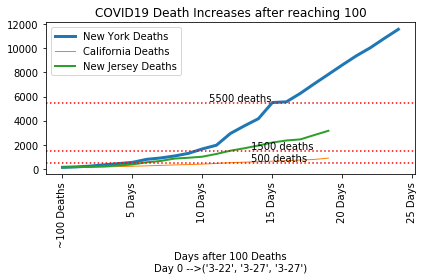

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



dates_100=[]
dates_ticks = []

for x, y, z in zip(greater_100_ny.index, greater_100_ca.index, greater_100_nj.index):
    dates_100.append((x.replace('2020-0', ''),y.replace('2020-0', ''),z.replace('2020-0', '')))

    
dates_ticks.append(dates_100[0])
dates_ticks.append('~100 Deaths')
for a in range(1,len(dates_100)):
    dates_ticks.append(str(str(a*5) + ' Days'))


# greater_100 = df_daily_death_ny[df_daily_death_ny['NY Deaths'] > 100]
ax = greater_100_ny.plot(kind='line', linewidth=3)
ax.set_xticklabels(labels=[], rotation=90)
plt.title('COVID19 Death Increases after reaching 100')

# greater_100_ca = df_daily_death_ca[df_daily_death_ca['CA Deaths'] > 100]
ax_1 = greater_100_ca.plot(kind='line',linewidth=1, ax = ax)
ax_1.set_xticklabels(labels=[], rotation=90)

ax_2 = greater_100_nj.plot(kind='line',linewidth=2, ax=ax)
ax_1.set_xticklabels(labels=dates_ticks, rotation=90)


string_deaths = 'Day 0 -->'+str(dates_100[0])


plt.xlabel('Days after 100 Deaths' +'\n'+ string_deaths)
ax.axhline(500, ls= ':', color='red')
ax.text(13.5,600, "500 deaths")
ax.axhline(1500, ls= ':', color='red')
ax.text(13.5,1600, "1500 deaths")
ax.axhline(5500, ls= ':', color='red')
ax.text(10.5,5600, "5500 deaths")
plt.tight_layout()
plt.savefig("Deaths over 100, 4-16")

In [555]:
!ls

Deaths over 100.png
Deaths past 100.ipynb
Five States and COVID19 DEATHS past 100.png
Five States and COVID19 DEATHS past 100_MA_GA_CO.png
Five States and COVID19 DEATHS past 100_WA_LA_IL.png
LICENSE
README.md
pop_dens.csv
us-counties.csv
us-states.csv


In [427]:
df_daily_total;

In [454]:
df_wash = great_100_data['Washington']['100_Deaths_Data']

In [104]:
from datetime import date
today = date.today()
def graph_data_five(df_1, df_2, df_3, df_4, df_5, title, line_num):

 
    dates_100=[]
    dates_ticks = []
    
    max_df = max([x[0] for x in [df_1.shape, df_2.shape, df_3.shape, df_4.shape, df_5.shape]])
    print(max_df)
    # print(df_1.index.min(), df_2.index.min(), df_3.index.min(), df_4.index.min(), df_5.index.min())
    # for x, y, z, a,b  in zip(df_1.index.min(), df_2.index.min(), df_3.index.min(), df_4.index.min(), df_5.index.min()):
    dates_100 = sorted([df_1.index.min(), df_2.index.min(), df_3.index.min(), df_4.index.min(), df_5.index.min()])
    dates_100 = [x.replace('2020-', "") for x in dates_100]
    dates_ticks.append("Day 0")
    dates_ticks.append("Day 0")
    
    if max_df >= 20:
        num = 4
    elif max_df > 17:
        num = 3
    elif max_df >14:
        num = 2
    else:
        num = 1
        
    for a in range(1,max_df):
        dates_ticks.append(str(str(a*num) + ' Day(s) After'))

    ax = df_1.plot(kind='line')
    ax.set_xticklabels(labels=[], rotation=90)
    plt.title('Time and Deaths after reaching 100')

    ax_1 = df_2.plot(kind='line', ax = ax)
    ax_1.set_xticklabels(labels=[], rotation=90)

    ax_2 = df_3.plot(kind='line', ax=ax)
    ax_1.set_xticklabels(labels=[], rotation=90)

    ax_3 = df_4.plot(kind='line', ax=ax)
    ax_1.set_xticklabels(labels=[], rotation=90)

    ax_4 = df_5.plot(kind='line', ax=ax)
    ax_1.set_xticklabels(labels=dates_ticks, rotation=90)

    string_dates = ''
    for x in sorted(list(set(dates_100))):
                  string_dates += x + ' '
    string_deaths = 'Day 0 -->'+str(string_dates)


    plt.xlabel('Days after 100 Deaths' +'\n'+ string_deaths) 
    ax.text(3*num,100, string_dates)
    ax.axhline(line_num, ls= ':', color='red')
    string_line = str(line_num) + ' deaths'
    ax.text(max_df/2 + 2*num,line_num + 20, string_line)
    #ax.axhline(1500, ls= ':', color='red')
    #ax.text(13.5,1600, "1500 deaths")
    #ax.axhline(5500, ls= ':', color='red')
    #ax.text(10.5,5600, "5500 deaths")
    plt.savefig(title)
    plt.tight_layout()
    plt.show()
    return('Graph of 5 States and COVID19 Deaths '+str(today))

24


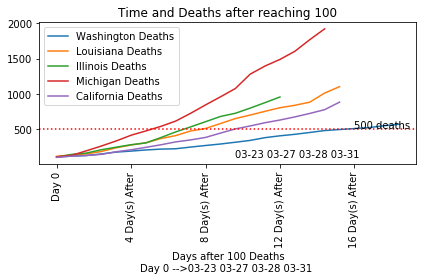

'Graph of 5 States and COVID19 Deaths 2020-04-17'

In [105]:
graph_data_five (great_100_data['Washington']['100_Deaths_Data'], great_100_data['Louisiana']['100_Deaths_Data'], \
                great_100_data['Illinois']['100_Deaths_Data'], great_100_data['Michigan']['100_Deaths_Data'], \
                great_100_data['California']['100_Deaths_Data'], 'Five States and COVID19 DEATHS past 100_WA_LA_IL', 500)

In [519]:
df_wash.index.min()

'2020-03-23'

17


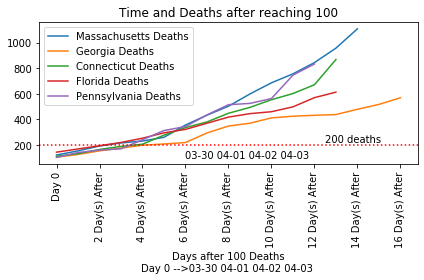

'Graph of 5 States and COVID19 Deaths 2020-04-17'

In [106]:
graph_data_five (great_100_data['Massachusetts']['100_Deaths_Data'], great_100_data['Georgia']['100_Deaths_Data'], \
                great_100_data['Connecticut']['100_Deaths_Data'], great_100_data['Florida']['100_Deaths_Data'], \
                great_100_data['Pennsylvania']['100_Deaths_Data'], 'Five States and COVID19 DEATHS past 100_MA_GA_CO', 200)

20


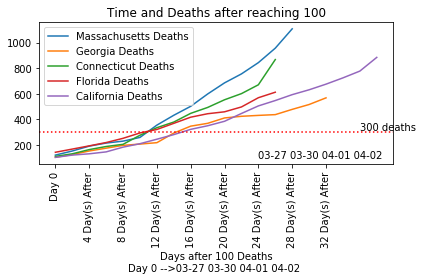

'Graph of 5 States and COVID19 Deaths 2020-04-17'

In [107]:
graph_data_five (great_100_data['Massachusetts']['100_Deaths_Data'], great_100_data['Georgia']['100_Deaths_Data'], \
                great_100_data['Connecticut']['100_Deaths_Data'], great_100_data['Florida']['100_Deaths_Data'], \
                great_100_data['California']['100_Deaths_Data'], 'Five States and COVID19 DEATHS past 100', 300)